In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['figure.figsize'] = 13, 10
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

In [3]:
#loading data
data=pd.read_excel("/Users/arvindpawar/Desktop/data_for_timeseries_analysis.xlsx")

In [4]:
#check data
data.head()

,Date/Time,Email,Plan Name,Plan ID,Amount,Transaction Fee,Number of Subs,Reformatted Date,Team Guess,Amount per Individual Sub,Annual Guess,Monthly-ized Revenue
0,2014-01-01 16:34:00,richard@poultryllc.com,Entry Monthly (ind_month),NaN,18.0,0.82,1.0,NaN,No,18.0,No,18.0
1,2014-01-02 03:29:00,ryanpurban@gmail.com,Entry Monthly (ind_month),NaN,18.0,0.82,1.0,NaN,No,18.0,No,18.0
2,2014-01-03 14:17:00,mhoffmann@college-park.com,Entry Monthly (ind_month),NaN,18.0,0.82,1.0,NaN,No,18.0,No,18.0
3,2014-01-03 17:59:00,dsilverstein@equatorcoffees.com,Business Monthly (ent_month),NaN,42.0,1.52,1.0,NaN,No,42.0,No,42.0
4,2014-01-03 20:25:00,jenifer.burkardt@hunterdouglas.com,Entry Monthly (ind_month),NaN,18.0,0.82,1.0,NaN,No,18.0,No,18.0


In [5]:
data.shape

(184372, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184372 entries, 0 to 184371
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date/Time                  184372 non-null  datetime64[ns]
 1   Email                      184371 non-null  object        
 2   Plan Name                  184341 non-null  object        
 3   Plan ID                    0 non-null       float64       
 4   Amount                     184372 non-null  float64       
 5   Transaction Fee            184372 non-null  float64       
 6   Number of Subs             184342 non-null  float64       
 7   Reformatted Date           19524 non-null   float64       
 8   Team Guess                 184372 non-null  object        
 9   Amount per Individual Sub  184342 non-null  float64       
 10  Annual Guess               184341 non-null  object        
 11  Monthly-ized Revenue       184341 non-null  float64 

In [7]:
data.describe()

,Plan ID,Amount,Transaction Fee,Number of Subs,Reformatted Date,Amount per Individual Sub,Monthly-ized Revenue
count,0.0,184372.000000,184372.000000,184342.000000,19524.000000,184342.000000,184341.000000
mean,NaN,74.216286,2.460451,1.266255,43858.727720,53.741105,36.880523
std,NaN,254.428674,7.334299,1.616234,57.200052,89.692480,16.634600
min,NaN,0.510000,0.310000,1.000000,43756.000000,0.510000,0.510000
25%,NaN,18.000000,0.820000,1.000000,43809.000000,18.000000,18.000000
50%,NaN,42.000000,1.520000,1.000000,43859.000000,42.000000,42.000000
75%,NaN,42.000000,1.520000,1.000000,43906.000000,42.000000,42.000000
max,NaN,25200.000000,731.100000,113.000000,43961.000000,1680.000000,140.000000


In [8]:
#setting date/time column as index of dataset
data = data.set_index('Date/Time')
data.index

DatetimeIndex(['2014-01-01 16:34:00', '2014-01-02 03:29:00',
               '2014-01-03 14:17:00', '2014-01-03 17:59:00',
               '2014-01-03 20:25:00', '2014-01-04 22:09:00',
               '2014-01-05 22:24:00', '2014-01-06 00:21:00',
               '2014-01-06 17:16:00', '2014-01-07 02:49:00',
               ...
               '2020-11-24 21:09:25', '2020-11-24 21:11:00',
               '2020-11-24 21:14:34', '2020-11-24 21:20:11',
               '2020-11-24 21:35:34', '2020-11-24 21:40:03',
               '2020-11-24 21:40:03', '2020-11-24 21:44:48',
               '2020-11-24 21:48:36', '2020-11-24 21:59:18'],
              dtype='datetime64[ns]', name='Date/Time', length=184372, freq=None)

Text(0.5, 0, 'Gross Amount')

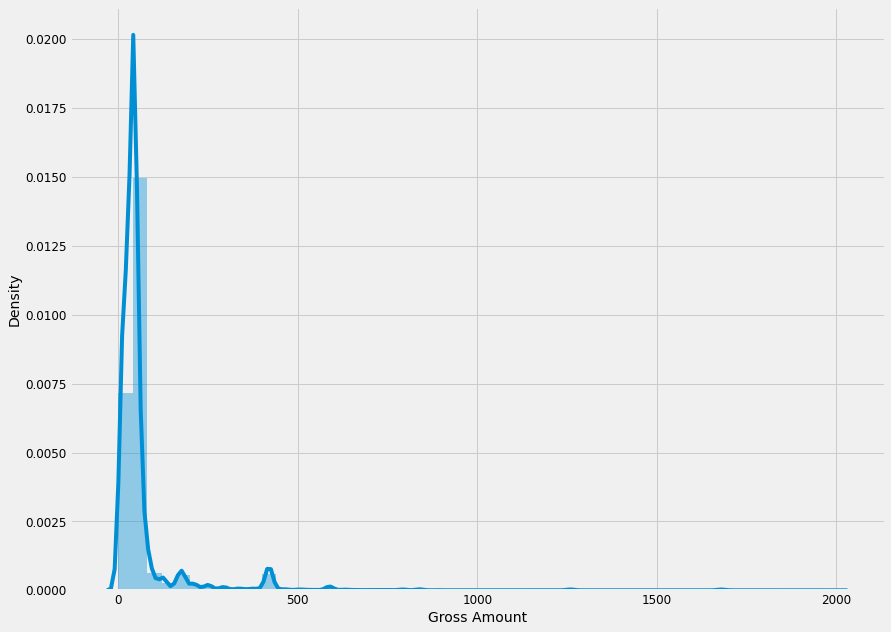

In [9]:
#Visualizing the data - displot
dataforviz=data["Amount"][data["Amount"]<=2000]

plot_spend = sns.distplot(dataforviz)
plt.xlabel('Gross Amount')

Text(0.5, 0, 'Gross Amount')

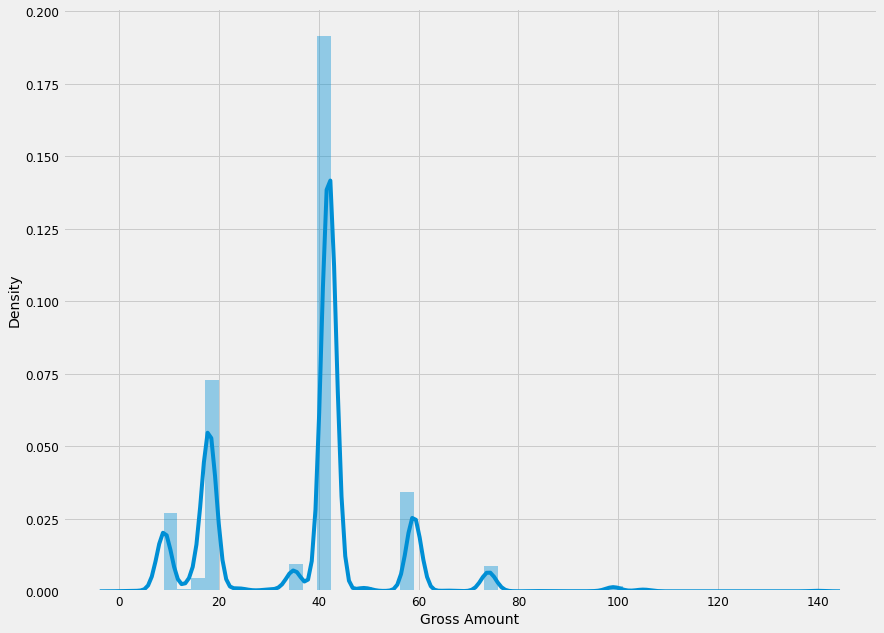

In [10]:
#Visualizing the data - displot
dataforviz=data["Monthly-ized Revenue"]

plot_spend = sns.distplot(dataforviz)
plt.xlabel('Gross Amount')

In [11]:
data.index = pd.to_datetime(data.index)

In [12]:
#storing the rolling mean of Monthly-ized revenue (can choose any continuos variable for forecasting)
#it is imoportant to choose rolling mean because it is stationary as compare to actual value which changes or flactuate a lot over time
ts = data['Monthly-ized Revenue'].resample('MS').mean()

In [13]:
ts

Date/Time
2014-01-01    20.381579
2014-02-01    20.141741
2014-03-01    21.663152
2014-04-01    22.524752
2014-05-01    22.419717
                ...    
2020-07-01    47.938789
2020-08-01    48.365873
2020-09-01    48.674627
2020-10-01    48.667208
2020-11-01    49.469157
Freq: MS, Name: Monthly-ized Revenue, Length: 83, dtype: float64

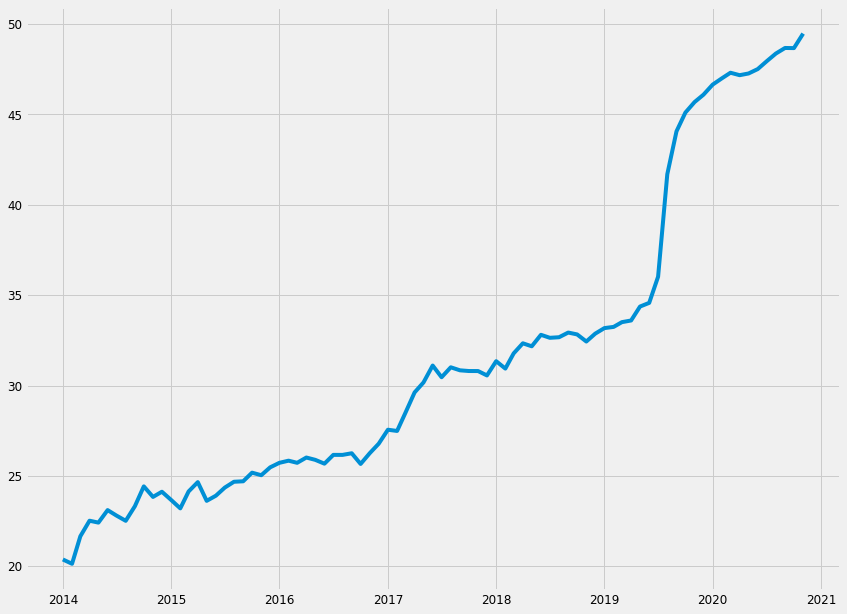

In [14]:
#this is mean
plt.plot(ts)

In [15]:
ts_total = data['Monthly-ized Revenue'].resample('MS').sum()

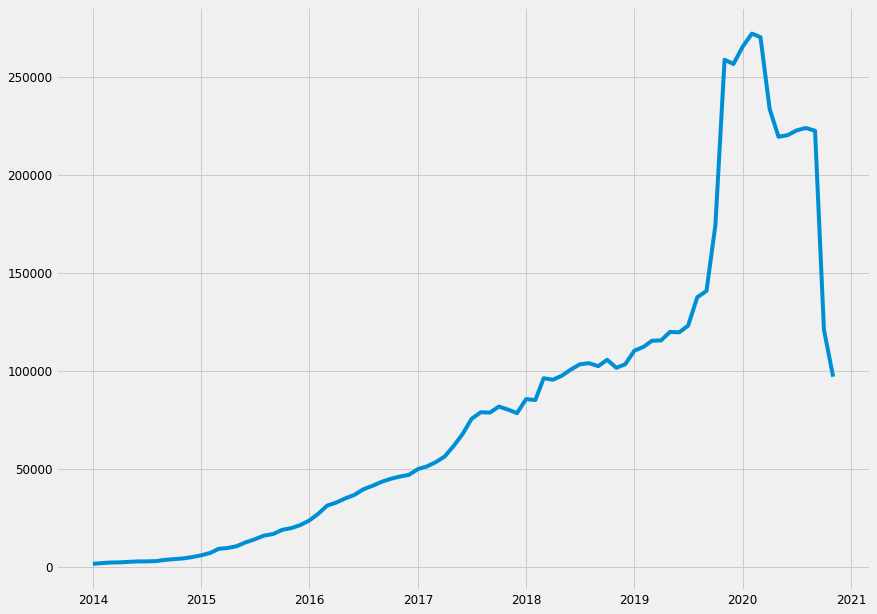

In [16]:
#this is actual revenue values over time
plt.plot(ts_total)

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
#testing the stationarity of data
def test_stationary(timeseries):
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    orig=plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(rolmean, color='red', label='Rolling Mean')
    std=plt.plot(rolstd, color='black', label= 'Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

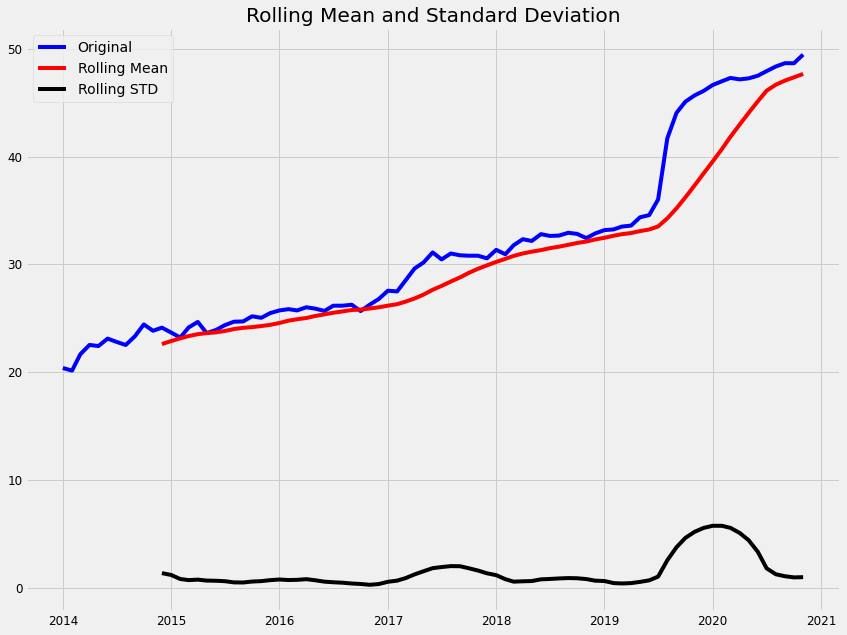

Results of Dickey-Fuller Test:
Test Statistic                  0.559016
p-value                         0.986561
#Lags Used                      1.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64


In [19]:
test_stationary(ts)

#### p-value is 0.98>0.05 and standard deviation is almost contant so our data is non stationary

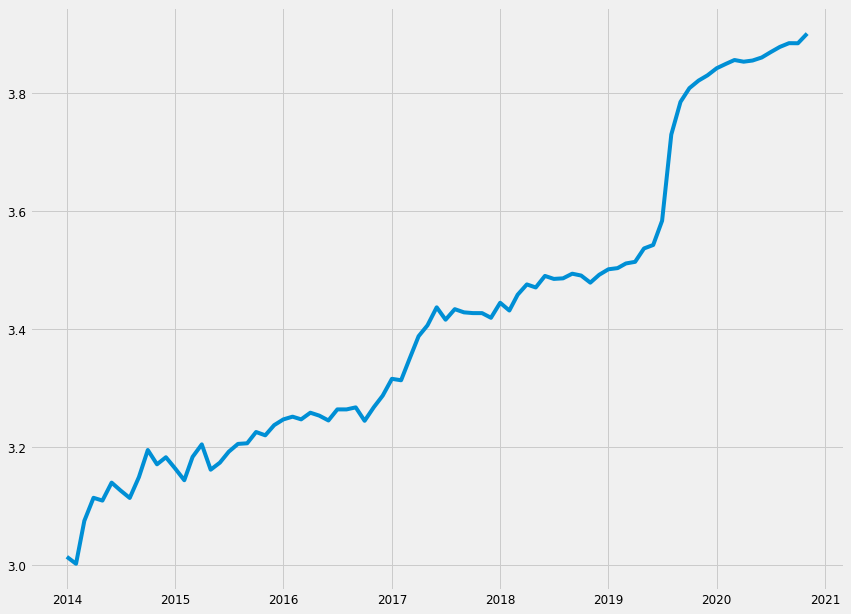

In [20]:
#to make our data stationary we are converting data into lagarithmic form

id_log_scale=np.log(ts)

plt.plot(id_log_scale)

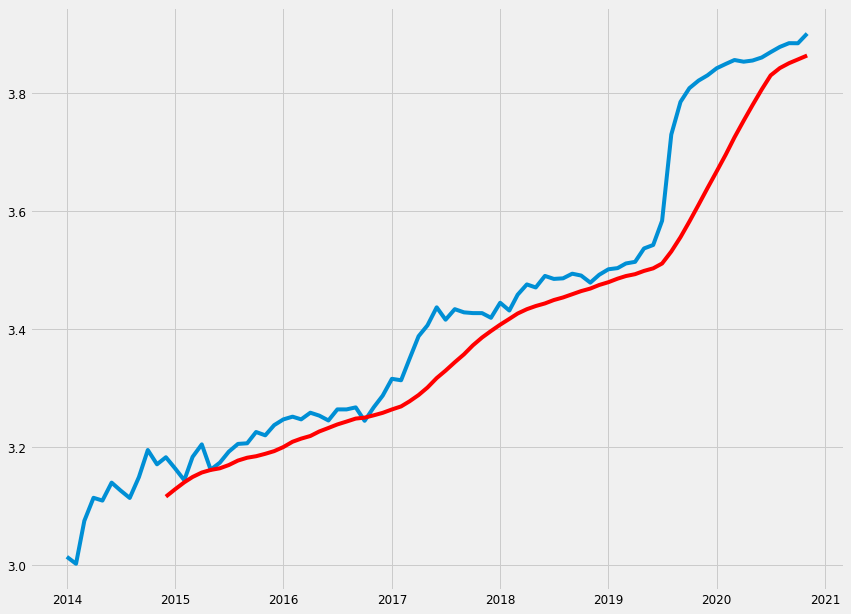

In [21]:
movingAverage = id_log_scale.rolling(window=12).mean()
movingSTD = id_log_scale.rolling(window=12).std()
plt.plot(id_log_scale)
plt.plot(movingAverage, color='red')

In [22]:
dataLogScaleMinusMovingAverage = id_log_scale - movingAverage
dataLogScaleMinusMovingAverage.head(12)

dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head()

Date/Time
2014-12-01    0.066745
2015-01-01    0.035326
2015-02-01    0.003535
2015-03-01    0.034027
2015-04-01    0.047674
Freq: MS, Name: Monthly-ized Revenue, dtype: float64

In [23]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    orig=plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(movingAverage, color='red', label='Rolling Mean')
    std=plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
   
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

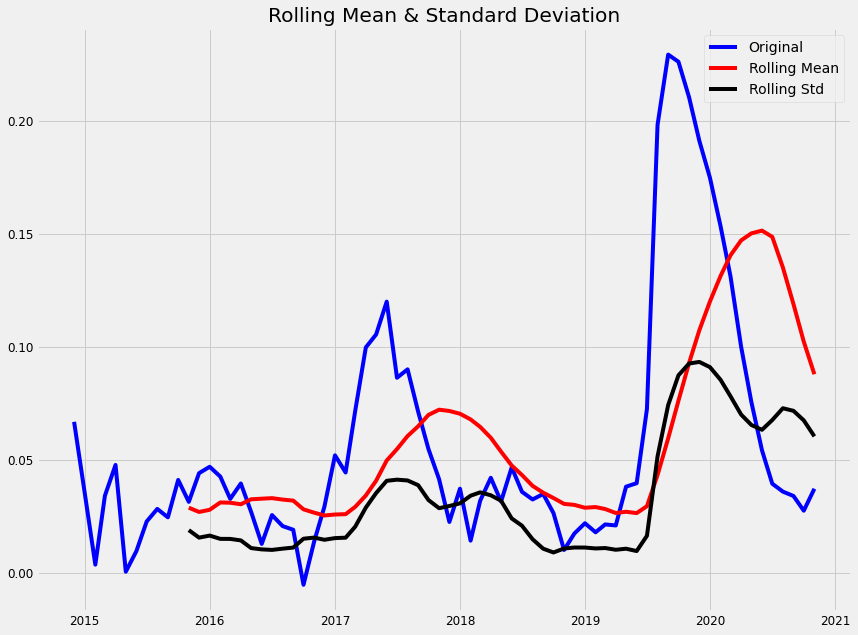

Results of Dickey-Fuller Test:
Test Statistic                 -2.639701
p-value                         0.085066
#Lags Used                      2.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


In [24]:
#testing stationarity on logarithmic data
test_stationarity(dataLogScaleMinusMovingAverage)

#### the standard deviation follows the distribution of actual and rolling average of data but still p value is greater than 0.05, but the data is stationary enough for forecasting.

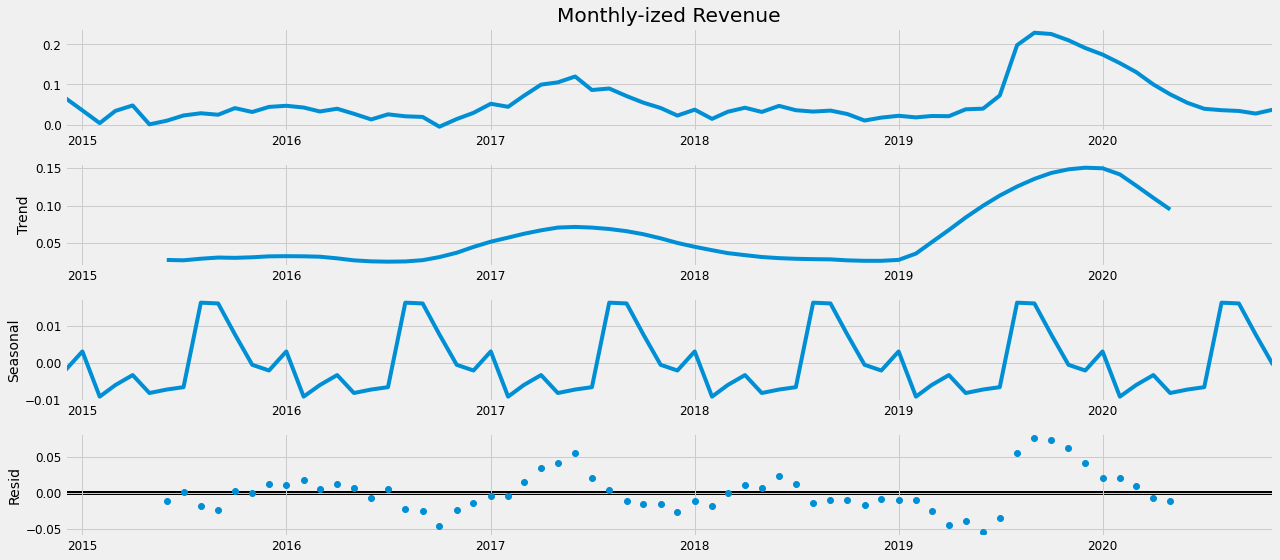

In [30]:
#Trend and seasonal trend analysis

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(dataLogScaleMinusMovingAverage, model='additive')
fig = decomposition.plot()
plt.show()

In [31]:
type(dataLogScaleMinusMovingAverage)

pandas.core.series.Series

In [32]:
dataLogScaleMinusMovingAverage

Date/Time
2014-12-01    0.066745
2015-01-01    0.035326
2015-02-01    0.003535
2015-03-01    0.034027
2015-04-01    0.047674
                ...   
2020-07-01    0.039365
2020-08-01    0.035860
2020-09-01    0.033926
2020-10-01    0.027430
2020-11-01    0.037139
Freq: MS, Name: Monthly-ized Revenue, Length: 72, dtype: float64

In [26]:
#combination of parameters (order and seasonal order) for training the model

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [27]:
# to get optimal values of parameters (order and season order)
#combination with lowest AIC is best
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:806.4762889950429
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:638.4215519869325
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:447.9670562667995
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:375.77722071831136
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:390.50022731753756
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:370.4029160391427
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:370.81488771379793
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:347.76987269677824
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:692.7825602235533
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:540.9045722525392
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:356.57135373929424
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:300.06350305062733
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:310.7544684240697
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:289.55449907634653
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:303.8069820681963
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:282.4241443601838
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:210.7957222447193
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:184.2744636704858
ARI

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:184.83818001579337
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:170.93796782195813
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:165.77473000553036
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:193.23814702630224
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:170.01143007439202
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:208.56749043698213
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:154.22047512405499
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:173.4981986947945
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:171.04900778647027
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:164.15581495544808
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:154.5950246076028
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:198.02328326076326
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:174.50025563033384
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:223.82226113900123


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:167.24943413278942
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:174.75280791414318
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:176.11892323521292
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:172.2924960622164
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:167.63849831325865
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:189.71344546814458
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:165.87828168084147
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:211.7862167847123
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:159.4540691936053
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:168.47162732521667
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:167.19153817339725
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:165.97503606592122
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:159.1543439355683
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:195.73434043087616
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:169.5082215940339
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:208.95226047963484
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:157.16612209920785
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:168.244189101866

In [28]:
#ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:154.34915459166052 has lowest AIC
#fitting the ARIMA model with optimal value of seasonal order and order
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5372      0.690      0.779      0.436      -0.815       1.890
ma.L1         -0.1298      0.781     -0.166      0.868      -1.661       1.401
ar.S.L12      -0.3130      0.361     -0.868      0.385      -1.020       0.394
ma.S.L12      -0.5431      0.383     -1.418      0.156      -1.294       0.208
sigma2         0.7310      0.132      5.522      0.000       0.472       0.990


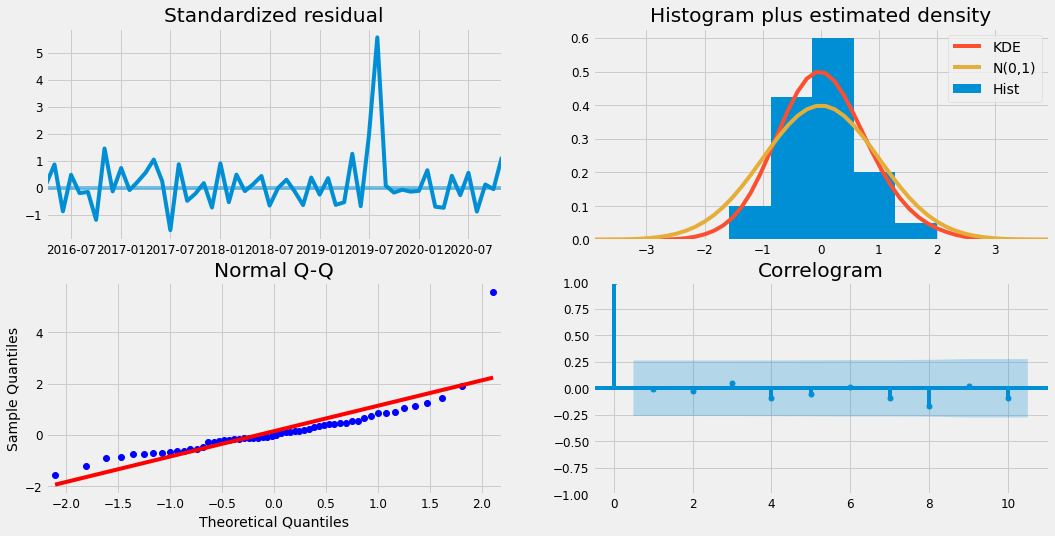

In [29]:
#Correlogram has normal distribution with mean zero and Normal Q-Q has linear line with mean zero that means
#the model has trained well
results.plot_diagnostics(figsize=(16, 8))
plt.show()

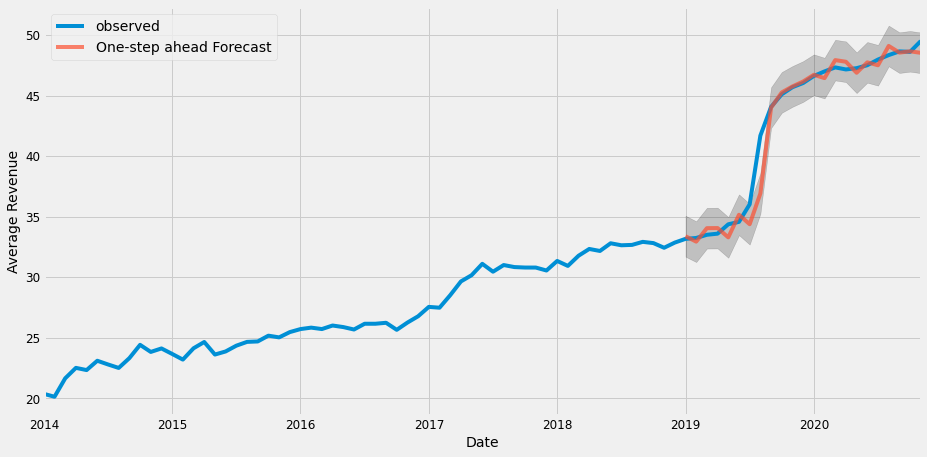

In [30]:
#validating forecasting by comparing observed and forecasted one
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = ts['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Average Revenue')
plt.legend()

plt.show()

In [31]:
#evaluating mean squared error
y_forecasted = pred.predicted_mean
y_truth = ts['2020-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.28


In [32]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.53


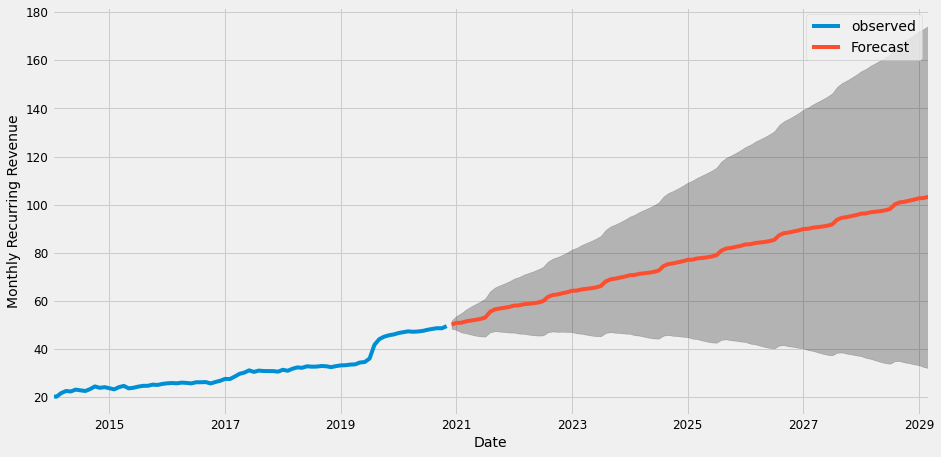

In [33]:
#predicting future revenue
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = ts.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Recurring Revenue')

plt.legend()
plt.show()